In [36]:
from SC_VCG_multiprocess import *
import matplotlib.pyplot as plt
agent_num,bid_num,cycle = 80,3,20

In [37]:
# 读取数据
#读数据的函数增加了一个参数，需要后续修改
platform_real_ratio = 1.0
mean_SC_VCG = read_pkl('SC-VCG',agent_num,bid_num,platform_real_ratio)
mean_SCE_VCG = read_pkl('SCE-VCG',agent_num,bid_num,platform_real_ratio)

t,SC_VCG_W_N,SC_VCG_profits,SCE_VCG_W_N,SCE_VCG_profits = [],[],[],[],[]
SC_AP,SC_Exchange,SCE_AP,SCE_Exchange,SCE_PExchange = [],[],[],[],[]

for key in mean_SC_VCG:
    t.append(key)               # t = [key for key in SC_VCG]   #横坐标
    value1 = mean_SC_VCG[key]
    value2 = mean_SCE_VCG[key] 
    SC_VCG_W_N.append(round(value1[0],2))
    SC_VCG_profits.append(round(value1[1],2))
    SC_AP.append(round(value1[0]-value1[1],2))
    SC_Exchange.append(round(value1[3],2))
    
    SCE_VCG_W_N.append(round(value2[0],2))
    SCE_VCG_profits.append(round(value2[1],2))
    SCE_AP.append(round(value2[0]-value2[1],2))
    SCE_Exchange.append(round(value2[3],2))
    SCE_PExchange.append(round(value2[5],2))

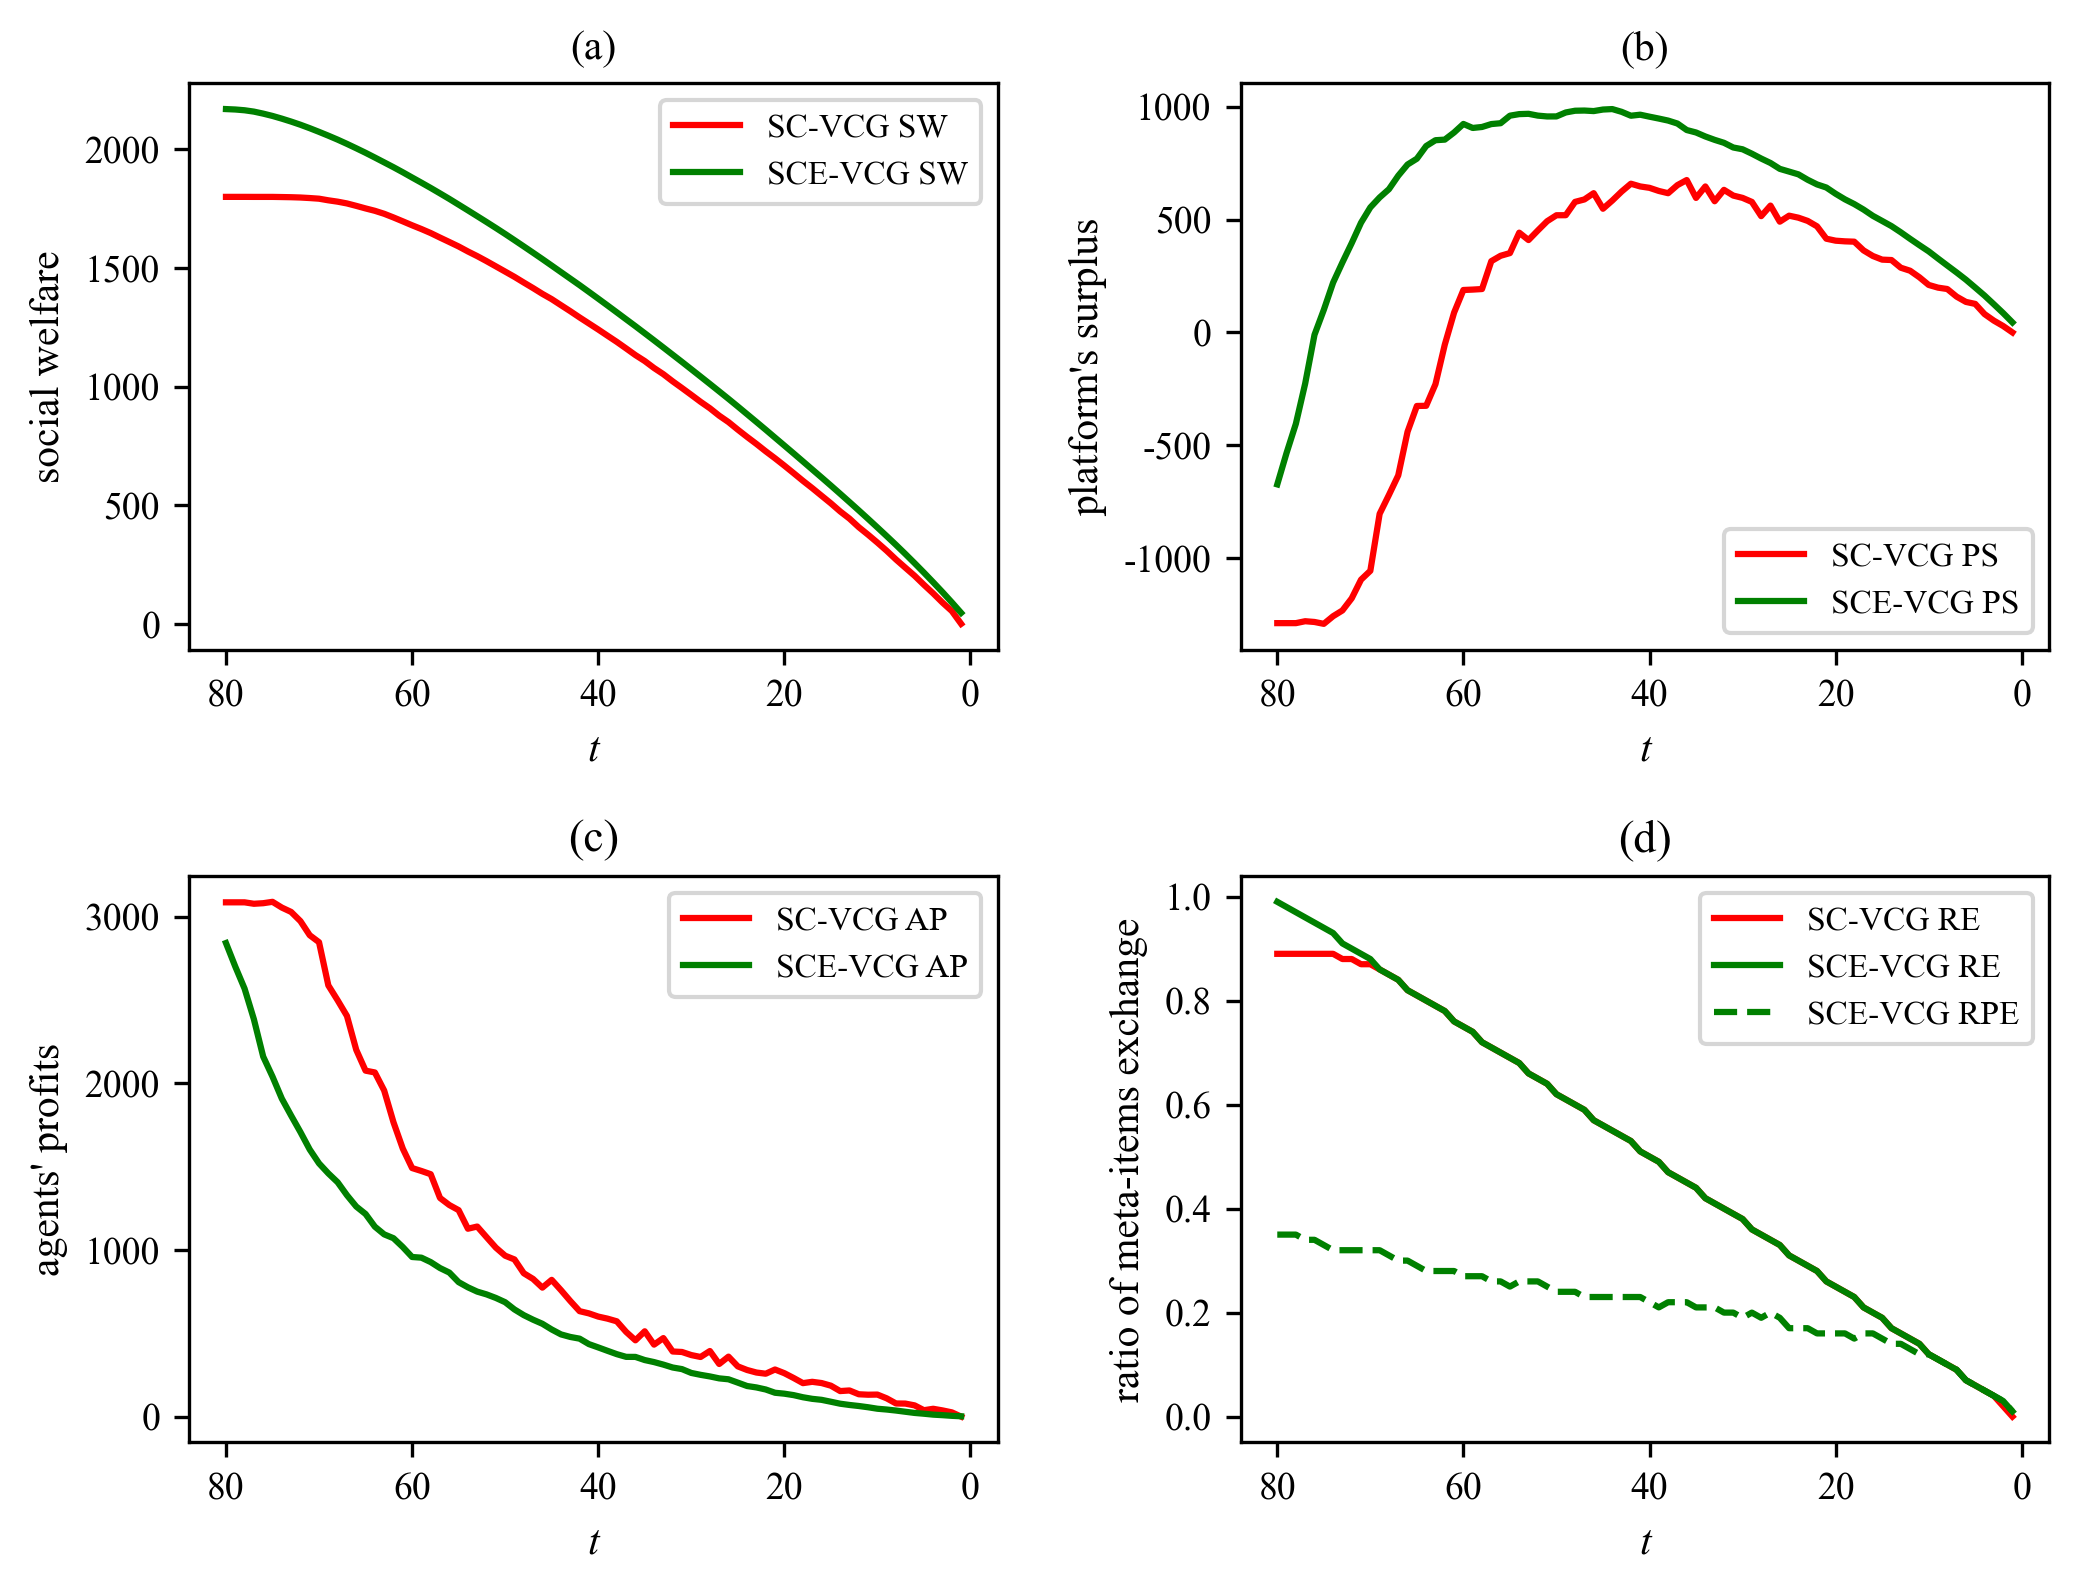

In [38]:
# 画图
plt.figure('Fig1', figsize = (8, 6),dpi = 300)
line_style = ['-', '--']
# colors = ["#d5695d","#5d8ca8","#65a479","#a564c9"]

plt.subplot(221)
y_max = max(max(SC_VCG_W_N),max(SCE_VCG_W_N))   
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(t, SC_VCG_W_N, c='red', label="SC-VCG SW", linestyle=line_style[0])
plt.plot(t, SCE_VCG_W_N, c='green', label='SCE-VCG SW', linestyle=line_style[0])
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':8})
plt.grid(False)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("social welfare", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(a)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()

plt.subplot(222)          
# y_min = min(min(SC_VCG_profits),min(SCE_VCG_profits))
# y_max = max(max(SC_VCG_profits),max(SCE_VCG_profits))
# plt.ylim(y_min - 150,y_max + 450)
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(t, SC_VCG_profits, c='red', label="SC-VCG PS", linestyle=line_style[0])
plt.plot(t, SCE_VCG_profits, c='green', label='SCE-VCG PS', linestyle=line_style[0])
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':8})
plt.grid(False)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("platform's surplus", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(b)", fontdict={'family' : 'Times New Roman','size': 10})     
plt.gca().invert_xaxis()

plt.subplot(223)   
y_max = 1
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(t, SC_AP, c='red', label="SC-VCG AP", linestyle=line_style[0])
plt.plot(t, SCE_AP, c='green', label='SCE-VCG AP', linestyle=line_style[0])
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':8})
plt.grid(False)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("agents' profits", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(c)", fontdict={'family' : 'Times New Roman','size': 11})     
plt.gca().invert_xaxis()

plt.subplot(224)  
y_max = 1  
plt.yticks(fontproperties = 'Times New Roman', size = 9)
plt.xticks(fontproperties = 'Times New Roman', size = 9)
plt.plot(t, SC_Exchange, c='red', label="SC-VCG RE", linestyle=line_style[0])
plt.plot(t, SCE_Exchange, c='green', label='SCE-VCG RE', linestyle=line_style[0])
plt.plot(t, SCE_PExchange, c='green', label='SCE-VCG RPE', linestyle=line_style[1])
plt.legend(loc='best',prop={'family' : 'Times New Roman','size':8})
plt.grid(False)
plt.xlabel("t", fontdict={'family' : 'Times New Roman','size': 10,'style':'italic'})
plt.ylabel("ratio of meta-items exchange", fontdict={'family' : 'Times New Roman','size': 10})
plt.title("(d)", fontdict={'family' : 'Times New Roman','size': 11})     
plt.gca().invert_xaxis()


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# plt.autofmt_xdate()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
path = './pic/'
pic_name = path + str(agent_num) + '_' + str(bid_num) + 'Fig1.1' + '.png'
plt.savefig(pic_name,dpi = 300,bbox_inches ="tight",transparent = True)
plt.show()

In [22]:
# RE: ratio of meta-item exchange
# RPE: ratio of platform escrow